In [1]:
def get_counts(df, time_step):
    filtered = df[df["time_step"] == time_step]
    counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in counts:
            counts[k] = 0.0
    return counts

def get_counts_df(df):
    time_steps = df["time_step"].unique().tolist()
    rows = [get_counts(df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def top_counts(df, time_step):
    top_df = df[df["y"] >= 15]
    top_df.reset_index(drop=True, inplace=True)
    filtered = top_df[top_df["time_step"] == time_step]
    top_counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in top_counts:
            top_counts[k] = 0.0
    return top_counts

def get_top_counts(df):
    top_df = df[df["y"] >= 15]
    top_df.reset_index(drop=True, inplace=True)
    time_steps = top_df["time_step"].unique().tolist()
    rows = [get_counts(top_df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def bottom_counts(df, time_step):
    bottom_df = df[df["y"] <= 5]
    bottom_df.reset_index(drop=True, inplace=True)
    filtered = bottom_df[bottom_df["time_step"] == time_step]
    bottom_counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in bottom_counts:
            bottom_counts[k] = 0.0
    return bottom_counts

def get_bottom_counts(df):
    bottom_df = df[df["y"] <= 5]
    bottom_df.reset_index(drop=True, inplace=True)
    time_steps = bottom_df["time_step"].unique().tolist()
    rows = [get_counts(bottom_df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def top_signal_transduction(df):
    top_df = df[df["y"] >= 15]
    top_df_HFRR = top_df[top_df["molecule"] == 15]
    top_result_df = top_df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    top_result_df['signal transduction time'] = top_result_df['max'] - top_result_df['min']
    # return top_result_df[['species_id', 'signal transduction time']]
    return top_result_df

def bottom_signal_transduction(df):
    bottom_df = df[df["y"] <= 5]
    bottom_df_HFRR = bottom_df[bottom_df["molecule"] == 15]
    bottom_result_df = bottom_df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    bottom_result_df['signal transduction time'] = bottom_result_df['max'] - bottom_result_df['min']
    return bottom_result_df


def HFRR_signal_transduction(df):
    df_HFRR = df[df["molecule"] == 15]
    result_df = df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    result_df['signal transduction time'] = result_df['max'] - result_df['min']
    return result_df

def FRR_signal_transduction(df):
    df_FRR = df[df["molecule"] == 16]
    result_df = df_FRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    result_df['signal transduction time'] = result_df['max'] - result_df['min']
    return result_df

def get_theta(file_name):
    theta = data_file.split('=')[1].split('.csv')[0]
    return float(theta)

molecules = {
    1: "vesicle_F",
    2: "vesicle_F_top",
    3: "vesicle_R",
    4: "vesicle_R_top",
    5: "vesicle_H",
    6: "vesicle_H_top",
    7: "fused_vesicle_F",
    8: "fused_vesicle_R",
    9: "fused_vesicle_H",
    10: "F",
    11: "H",
    12: "R",
    13: "RR",
    14: "FH",
    15: "FHRR",
    16: "FRR",
    17: "F_species",
    18: "H_species",
    19: "R_species",
    20: "F-membrane-bound"

}

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from statistics import mean
import scipy.stats as stats
import statistics
import re
from nlcor import nlcor
from scipy.stats import pearsonr
import seaborn as sns

In [3]:
DATA_PATH = 'output_HSPG_test/csv_files'
DATA_PATH2 = 'output_HSPG_decay/plots_data'
SAVE_PATH = 'output_HSPG_test/figures'

In [4]:
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [5]:
decay_00 = []
decay_01 = []
decay_05 = []
decay_09 = []
decay_10 = []
for subdir, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.find('plots') >= 0:
            if file.find('0.0') >= 0:
                decay_00.append(file)
            elif file.find('0.1') >= 0:
                decay_01.append(file)
            elif file.find('0.5') >= 0:
                decay_05.append(file)
            elif file.find('0.9') >= 0:
                decay_09.append(file)
            elif file.find('1.0') >= 0:
                decay_10.append(file)

decay_00_ = []
decay_01_ = []
decay_05_ = []
decay_09_ = []
decay_10_ = []
for subdir, dirs, files in os.walk(DATA_PATH2):
    for file in files:
        if file.find('0.0') >= 0:
            decay_00_.append(file)
        elif file.find('0.1') >= 0:
            decay_01_.append(file)
        elif file.find('0.5') >= 0:
            decay_05_.append(file)
        elif file.find('0.9') >= 0:
            decay_09_.append(file)
        elif file.find('1.0') >= 0:
            decay_10_.append(file)

In [6]:
data00 = []
for i in decay_00:
    data = pd.read_csv(f'{DATA_PATH}/plots_0.0/{i}')
    data = data[data['timestep'] == 160]
    data00.append(data)

data00 = pd.concat(data00)

data01 = []
for i in decay_01:
    data = pd.read_csv(f'{DATA_PATH}/plots_0.1/{i}')
    data = data[data['timestep'] == 160]
    data01.append(data)

data01 = pd.concat(data01)


data05 = []
for i in decay_05:
    data = pd.read_csv(f'{DATA_PATH}/plots_0.5/{i}')
    data = data[data['timestep'] == 160]
    data05.append(data)

data05 = pd.concat(data05)


data09 = []
for i in decay_09:
    data = pd.read_csv(f'{DATA_PATH}/plots_0.9/{i}')
    data = data[data['timestep'] == 160]
    data09.append(data)

data09 = pd.concat(data09)


data10 = []
for i in decay_10:
    data = pd.read_csv(f'{DATA_PATH}/plots_1.0/{i}')
    data = data[data['timestep'] == 160]
    data10.append(data)

data10 = pd.concat(data10)

data00_ = []
for i in decay_00_:
    data = pd.read_csv(f'{DATA_PATH2}/decay=0.0/{i}')
    data = data[data['timestep'] == 160]
    data00_.append(data)

data00_ = pd.concat(data00_)

data01_ = []
for i in decay_01_:
    data = pd.read_csv(f'{DATA_PATH2}/decay=0.1/{i}')
    data = data[data['timestep'] == 160]
    data01_.append(data)

data01_ = pd.concat(data01_)


data05_ = []
for i in decay_05_:
    data = pd.read_csv(f'{DATA_PATH2}/decay=0.5/{i}')
    data = data[data['timestep'] == 160]
    data05_.append(data)

data05_ = pd.concat(data05_)


data09_ = []
for i in decay_09_:
    data = pd.read_csv(f'{DATA_PATH2}/decay=0.9/{i}')
    data = data[data['timestep'] == 160]
    data09_.append(data)

data09_ = pd.concat(data09_)


data10_ = []
for i in decay_10_:
    data = pd.read_csv(f'{DATA_PATH2}/decay=1.0/{i}')
    data = data[data['timestep'] == 160]
    data10_.append(data)

data10_ = pd.concat(data10_)

In [7]:
data00.insert(1, "theta", [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], True)
data01.insert(1, "theta", [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], True)
data05.insert(1, "theta", [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], True)
data09.insert(1, "theta", [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9], True)
data10.insert(1, "theta", [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], True)
data00_.insert(1, "theta", [0.0, 0.0, 0.0, 0.0, 0.0], True)
data01_.insert(1, "theta", [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], True)
data05_.insert(1, "theta", [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], True)
data09_.insert(1, "theta", [0.9, 0.9, 0.9, 0.9, 0.9, 0.9], True)
data10_.insert(1, "theta", [1.0, 1.0, 1.0, 1.0, 1.0], True)

In [8]:
data00.drop(columns=['Unnamed: 0'])
data01.drop(columns=['Unnamed: 0'])
data05.drop(columns=['Unnamed: 0'])
data09.drop(columns=['Unnamed: 0'])
data10.drop(columns=['Unnamed: 0'])
data00_.drop(columns=['Unnamed: 0'])
data01_.drop(columns=['Unnamed: 0'])
data05_.drop(columns=['Unnamed: 0'])
data09_.drop(columns=['Unnamed: 0'])
data10_.drop(columns=['Unnamed: 0'])

,theta,timestep,1,2,3,4,5,6,7,8,...,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2,20.2
1599,1.0,160.0,3854,3864,3821,3979.0,3865,3764,0.0,0.0,...,0.0,14.0,710.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1599,1.0,160.0,3797,3773,3830,3848.0,3795,3884,0.0,0.0,...,0.0,9.0,1362.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1599,1.0,160.0,3881,3911,3826,3766.0,3839,3820,0.0,0.0,...,0.0,9.0,876.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1599,1.0,160.0,3762,3831,3976,3851.0,3879,3835,0.0,0.0,...,0.0,5.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,1.0,160.0,3790,3778,3834,3775.0,3764,3811,0.0,0.0,...,0.0,4.0,745.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
all_plots = pd.concat([data00, data01, data05, data09, data10])

In [10]:
all_plots

,Unnamed: 0,theta,timestep,1,2,3,4,5,6,7,...,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2,20.2
1599,1599,0.0,160.0,3793.0,3784.0,3839,3890,3870,3739.0,0.0,...,13.0,3.0,0.0,680.0,0.0,664.0,0.0,0.0,0.0,0.0
1599,1599,0.0,160.0,3672.0,3860.0,3807,3779,3829,3835.0,0.0,...,6.0,4.0,0.0,914.0,363.0,313.0,0.0,0.0,0.0,0.0
1599,1599,0.0,160.0,3925.0,3852.0,3870,3783,3771,3919.0,0.0,...,36.0,3.0,0.0,1774.0,413.0,210.0,0.0,0.0,0.0,0.0
1599,1599,0.0,160.0,3888.0,3728.0,3996,3908,3865,3738.0,0.0,...,990.0,5.0,0.0,994.0,494.0,130.0,0.0,0.0,0.0,0.0
1599,1599,0.0,160.0,3803.0,3765.0,3862,3790,3770,3943.0,0.0,...,674.0,8.0,0.0,766.0,662.0,114.0,0.0,0.0,0.0,0.0
1599,1599,0.0,160.0,3810.0,3830.0,3872,3787,3782,3763.0,0.0,...,9.0,12.0,0.0,690.0,514.0,754.0,0.0,0.0,0.0,0.0
1599,1599,0.0,160.0,3839.0,3844.0,3847,3861,3806,3736.0,0.0,...,346.0,6.0,0.0,1371.0,473.0,104.0,0.0,0.0,0.0,0.0
1599,1599,0.1,160.0,3811.0,3798.0,3851,3879,3845,3942.0,0.0,...,11.0,6.0,0.0,653.0,232.0,358.0,0.0,0.0,0.0,0.0
1599,1599,0.1,160.0,3764.0,3782.0,3906,3884,3867,3909.0,0.0,...,0.0,6.0,0.0,448.0,382.0,640.0,0.0,0.0,0.0,0.0
1599,1599,0.1,160.0,3974.0,3758.0,3798,3812,3872,3895.0,0.0,...,1.0,9.0,0.0,273.0,228.0,612.0,0.0,0.0,0.0,0.0


In [11]:
all_plots['total_signal'] = all_plots['15'] + all_plots['16']

In [12]:
# theta_values = [0.0, 0.1, 0.5, 0.9, 1.0]
# HFRR_means = []
# HFRR_stds = []
# FRR_means = []
# FRR_stds = []
# sum_means = []
# sum_stds = []
# means1 = pd.DataFrame()
# means2 = pd.DataFrame()
# for theta in theta_values:
#     mean_theta = all_plots[all_plots['theta'] == theta]
#     means1.append(mean_theta['15'])
#     means2.append(mean_theta['16'])
#     HFRR_mean = np.mean(mean_theta['15'])
#     HFRR_std = np.std(mean_theta['15'])
#     HFRR_means.append(HFRR_mean)
#     HFRR_stds.append(HFRR_std)
# 
#     FRR_mean = np.mean(mean_theta['16'])
#     FRR_std = np.std(mean_theta['16'])
#     FRR_means.append(FRR_mean)
#     FRR_stds.append(FRR_std)
# 
#     sum_counts = mean_theta['15'] + mean_theta['16']
#     sum_mean = np.mean(sum_counts)
#     sum_std = np.std(sum_counts)
#     sum_means.append(sum_mean)
#     sum_stds.append(sum_std)

In [13]:
# all_plots = all_plots.groupby(level=0).first()

In [14]:
mean00 = all_plots[all_plots['theta'] == 0.0 ]
HFRR_mean_00 = np.mean(mean00['15'])
HFRR_std_00 = np.std(mean00['15'])

mean01 = all_plots[all_plots['theta'] == 0.1 ]
HFRR_mean_01 = np.mean(mean01['15'])
HFRR_std_01 = np.std(mean01['15'])

mean05 = all_plots[all_plots['theta'] == 0.5 ]
HFRR_mean_05 = np.mean(mean05['15'])
HFRR_std_05 = np.std(mean05['15'])

mean09 = all_plots[all_plots['theta'] == 0.9 ]
HFRR_mean_09 = np.mean(mean09['15'])
HFRR_std_09 = np.std(mean09['15'])

mean10 = all_plots[all_plots['theta'] == 1.0 ]
HFRR_mean_10 = np.mean(mean10['15'])
HFRR_std_10 = np.std(mean10['15'])


mean_00 = all_plots[all_plots['theta'] == 0.0 ]
FRR_mean_00 = np.mean(mean00['16'])
FRR_std_00 = np.std(mean00['16'])

mean01 = all_plots[all_plots['theta'] == 0.1 ]
FRR_mean_01 = np.mean(mean01['16'])
FRR_std_01 = np.std(mean01['16'])

mean05 = all_plots[all_plots['theta'] == 0.5 ]
FRR_mean_05 = np.mean(mean05['16'])
FRR_std_05 = np.std(mean05['16'])

mean09_FRR = all_plots[all_plots['theta'] == 0.9 ]
FRR_mean_09 = np.mean(mean09['16'])
FRR_std_09 = np.std(mean09['16'])

mean10_FRR = all_plots[all_plots['theta'] == 1.0 ]
FRR_mean_10 = np.mean(mean10_FRR['16'])
FRR_std_10 = np.std(mean10_FRR['16'])

sum_counts_00 = mean00['15'] + mean00['16']
sum_mean_00 = np.mean(sum_counts_00)
sum_std_00 = np.std(sum_counts_00)
sum_counts_01 = mean01['15'] + mean01['16']
sum_mean_01 = np.mean(sum_counts_01)
sum_std_01 = np.std(sum_counts_01)
sum_counts_05 = mean05['15'] + mean05['16']
sum_mean_05 = np.mean(sum_counts_05)
sum_std_05 = np.std(sum_counts_05)
sum_counts_09 = mean09['15'] + mean09['16']
sum_mean_09 = np.mean(sum_counts_09)
sum_std_09 = np.std(sum_counts_09)
sum_counts_10 = mean10['15'] + mean10['16']
sum_mean_10 = np.mean(sum_counts_10)
sum_std_10 = np.std(sum_counts_10)

sum_means = [sum_mean_00, sum_mean_01, sum_mean_05, sum_mean_09, sum_mean_10]
sum_std = [sum_std_00, sum_std_01, sum_std_05, sum_std_09, sum_std_10]
means1 = pd.concat([mean00['15'], mean01['15'], mean05['15'], mean09['15'], mean10['15']])
means2 = pd.concat([mean00['16'], mean01['16'], mean05['16'], mean09['16'], mean10['16']])

In [15]:
HFRR_mean = [HFRR_mean_00, HFRR_mean_01, HFRR_mean_05, HFRR_mean_09, HFRR_mean_10]
HFRR_std = [HFRR_std_00, HFRR_std_01, HFRR_std_05, HFRR_std_09, HFRR_std_10]
FRR_mean = [FRR_mean_00, FRR_mean_01, FRR_mean_05, FRR_mean_09, FRR_mean_10]
FRR_std = [FRR_std_00, FRR_std_01, FRR_std_05, FRR_std_09, FRR_std_10]
thetas = [0.0, 0.1, 0.5, 0.9, 1.0]

In [16]:
all_plots['theta']

1599    0.0
1599    0.0
1599    0.0
1599    0.0
1599    0.0
1599    0.0
1599    0.0
1599    0.1
1599    0.1
1599    0.1
1599    0.1
1599    0.1
1599    0.1
1599    0.1
1599    0.5
1599    0.5
1599    0.5
1599    0.5
1599    0.5
1599    0.5
1599    0.5
1599    0.9
1599    0.9
1599    0.9
1599    0.9
1599    0.9
1599    0.9
1599    0.9
1599    1.0
1599    1.0
1599    1.0
1599    1.0
1599    1.0
1599    1.0
1599    1.0
Name: theta, dtype: float64

In [17]:
all_plots['total_signal']

1599    1839.0
1599    1496.0
1599    1433.0
1599    1520.0
1599    1717.0
1599    2234.0
1599    1825.0
1599    1397.0
1599    1639.0
1599    1469.0
1599    1750.0
1599    1725.0
1599    1423.0
1599    1544.0
1599    1521.0
1599    1077.0
1599     888.0
1599     555.0
1599    1172.0
1599    1283.0
1599    1025.0
1599     796.0
1599    1014.0
1599     916.0
1599     682.0
1599     810.0
1599      76.0
1599    1068.0
1599     982.0
1599       3.0
1599    1010.0
1599     804.0
1599    1064.0
1599     848.0
1599    1263.0
Name: total_signal, dtype: float64

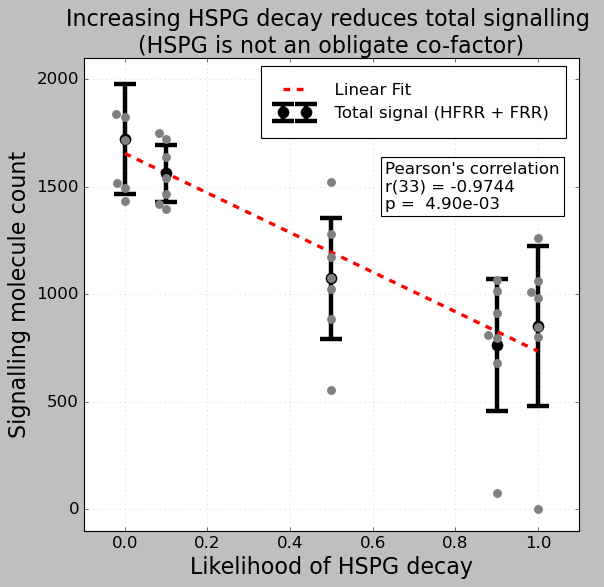

In [35]:
plt.style.use('classic')
plt.figure(figsize=(7.5, 7.5))
plt.tick_params(axis='both', which='major', labelsize=15)
# if you want to add lines between points use   #linestyle='-', lw=1
# plt.errorbar(thetas, HFRR_mean, yerr=HFRR_std, fmt='o', ms=7, label='HFRR', capsize=10, alpha=1, color="#5ec962", elinewidth=4, capthick=4, markeredgecolor='#5ec962', linestyle='-', lw=2)
# plt.errorbar(thetas, FRR_mean, yerr=FRR_std, fmt='o', ms=7, label='FRR', capsize=10, alpha=1, color='#21918c', elinewidth=4, capthick=4,  markeredgecolor='#21918c', linestyle='-', lw=2)
plt.errorbar(thetas, sum_means, yerr=sum_std, fmt='o', ms=10, label='  Total signal (HFRR + FRR)', capsize = 10, alpha=1, color='black', elinewidth=4, capthick=4, markeredgecolor='black',)
sns.swarmplot(data=all_plots, x='theta', y='total_signal',native_scale=True, color='grey', size=8)

coefficients = np.polyfit(all_plots['theta'], all_plots['total_signal'], 1)
poly=np.poly1d(coefficients)
plt.plot(thetas, poly(thetas), color='red', linestyle='--', lw=3, label='  Linear Fit')

x=pearsonr(thetas, sum_means)
p_stat = x[0]
p_val = x[1]
plt.text(x=0.63, y=1400, s=f"Pearson's correlation\nr(33) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

plt.legend(bbox_to_anchor = (0.99, 1), fontsize=15, borderpad=1)
plt.xlabel('Likelihood of HSPG decay', fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylim(-100, 2100)
plt.ylabel('Signalling molecule count', fontsize=20)
plt.grid(color='grey', alpha=0.5)
plt.title('Increasing HSPG decay reduces total signalling \n(HSPG is not an obligate co-factor)', fontsize=20)
plt.tight_layout()
plt.savefig('output_HSPG_test/figures/signalling_molecule_count.png')

In [19]:
new_df = pd.melt(all_plots, id_vars=['theta'], value_vars=['15', '16'], var_name='molecule', value_name='count')

In [20]:
new_df['molecule'] = new_df['molecule'].replace({'15':'HFRR', '16':'FRR'})

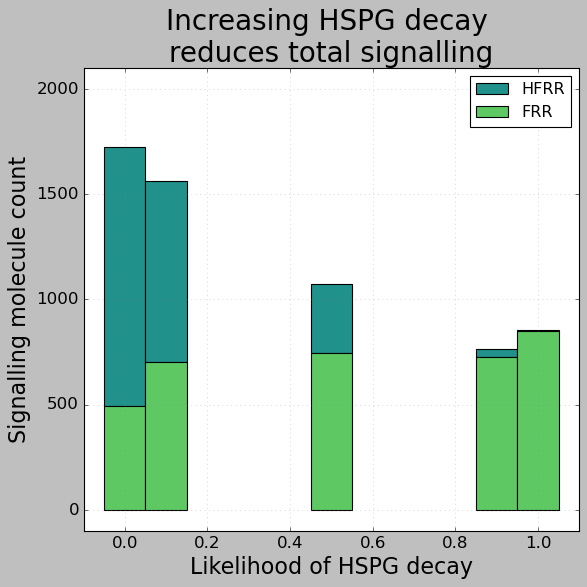

In [21]:
plt.style.use('classic')
plt.figure(figsize=(7.5, 7.5))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.bar(thetas, HFRR_mean, bottom=FRR_mean,  color='#21918c', width=0.1, label='HFRR')
plt.bar(thetas, FRR_mean, color="#5ec962", width=0.1, label='FRR')
plt.legend(loc='best')
plt.xlabel('Likelihood of HSPG decay', fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylim(-100, 2100)
plt.ylabel('Signalling molecule count', fontsize=20)
plt.grid(color='grey', alpha=0.5)
plt.title('Increasing HSPG decay \nreduces total signalling', fontsize=25)
plt.tight_layout()
plt.savefig('output_HSPG_test/figures/stacked_bar_chart.png')

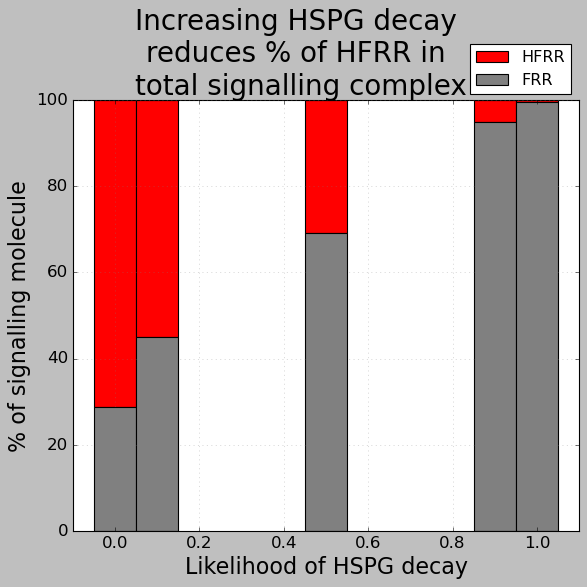

In [30]:
plt.style.use('classic')
plt.figure(figsize=(7.5, 7.5))
plt.tick_params(axis='both', which='major', labelsize=15)

totals = [i+j for i,j in zip(HFRR_mean, FRR_mean)]
HFRR_bar = [i / j * 100 for i,j in zip(HFRR_mean, totals)]
FRR_bar = [i / j * 100 for i, j in zip(FRR_mean, totals)]

plt.bar(thetas, HFRR_bar, bottom=FRR_bar,  color='red', width=0.1, label='HFRR')
plt.bar(thetas, FRR_bar, color="grey", width=0.1, label='FRR')
plt.legend(bbox_to_anchor=(1.0, 1.15))
plt.xlabel('Likelihood of HSPG decay', fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylim(0, 100)
plt.ylabel('% of signalling molecule', fontsize=20)
plt.grid(color='grey', alpha=0.5)
plt.title('Increasing HSPG decay \nreduces % of HFRR in \ntotal signalling complex', fontsize=25, x=0.45)
plt.tight_layout()
plt.savefig('/Users/Aimee/Desktop/percentage_bar_chart.png')

In [23]:
membrane_F_species_00 = mean00['14'] + mean00['15'] + mean00['16']
memF_mean_00 = np.mean(membrane_F_species_00)
memF_std_00 = np.std(membrane_F_species_00)
log_std_00 = np.std(np.log(membrane_F_species_00))
membrane_F_species_01 = mean01['14'] + mean01['15'] + mean01['16']
memF_mean_01 = np.mean(membrane_F_species_01)
memF_std_01 = np.std(membrane_F_species_01)
log_std_01 = np.std(np.log(membrane_F_species_01))
membrane_F_species_05 = mean05['14'] + mean05['15'] + mean05['16']
memF_mean_05 = np.mean(membrane_F_species_05)
memF_std_05 = np.std(membrane_F_species_05)
log_std_05= np.std(np.log(membrane_F_species_05))
membrane_F_species_09 = mean09['14'] + mean09['15'] + mean09['16']
memF_mean_09 = np.mean(membrane_F_species_09)
memF_std_09 = np.std(membrane_F_species_09)
log_std_09 = np.std(np.log(membrane_F_species_09))
membrane_F_species_10 = mean10['14'] + mean10['15'] + mean10['16']
memF_mean_10 = np.mean(membrane_F_species_10)
memF_std_10 = np.std(membrane_F_species_10)
log_std_10 = np.std(np.log(membrane_F_species_10))

memF_means = [memF_mean_00, memF_mean_01, memF_mean_05, memF_mean_09, memF_mean_10]
memF_stds = [memF_std_00, memF_std_01, memF_std_05, memF_std_09, memF_std_10]
log_stds = [log_std_00, log_std_01, log_std_05, log_std_09, log_std_10]


F_species = []
F_species.extend(membrane_F_species_00.tolist())
F_species.extend(membrane_F_species_01.tolist())
F_species.extend(membrane_F_species_05.tolist())
F_species.extend(membrane_F_species_09.tolist())
F_species.extend(membrane_F_species_10.tolist())
thetas1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,]


In [24]:
print(type(membrane_F_species_00))

<class 'pandas.core.series.Series'>


/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


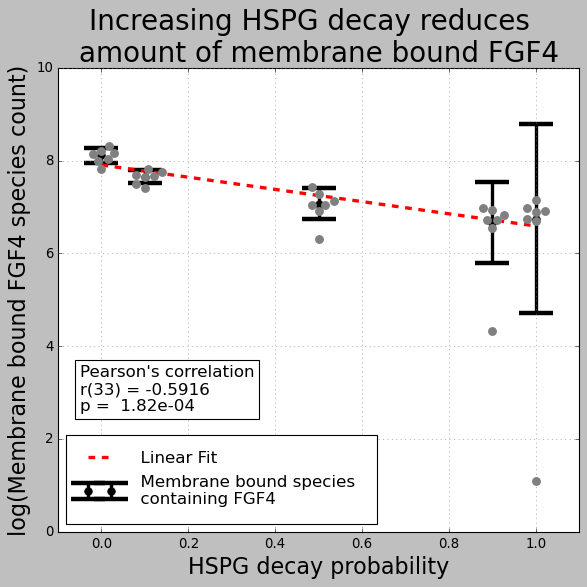

In [34]:
cmap = plt.colormaps['viridis']
viridis = cmap(np.linspace(0,1, 10))

x = pearsonr(thetas1, np.log(F_species))
p_stat = x[0]
p_val = x[1]

plt.figure(figsize=(7.5, 7.5))
plt.style.use('classic')
plt.errorbar(thetas, np.log(memF_means), yerr=log_stds, fmt='o', ms=7, capsize=15, capthick=4, lw=3, color='black', markeredgecolor='black', label='  Membrane bound species \n  containing FGF4')
coefficients = np.polyfit(thetas, np.log(memF_means), 1)
poly = np.poly1d(coefficients)
sns.swarmplot(x=thetas1, y=np.log(F_species), native_scale=True, color='grey', size=8)
plt.text(x=-0.05, y=2.6,s=f"Pearson's correlation\nr(33) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)
plt.xlabel('HSPG decay probability', fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylabel('log(Membrane bound FGF4 species count)', fontsize=20)
plt.grid(color='grey')
plt.title('Increasing HSPG decay reduces  \namount of membrane bound FGF4', fontsize=25)
plt.plot(thetas, poly(thetas), color='red', linestyle='--', linewidth=3, label='  Linear Fit')  # Plot the linear fit line
plt.legend(loc='lower left', fontsize=15, borderpad=1)
plt.tight_layout()
plt.savefig('output_HSPG_test/figures/membrane_FGF_log.png')